In [1]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 22.1 MB/s eta 0:00:01


In [38]:
import cv2
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [52]:
def load_images(folder):
    dir_list = []
    for filename in os.listdir(folder):
        dir_list.append(filename)
    return dir_list

In [53]:
L=load_images("/Users/ira/Documents/GitHub/ML-Project/Full Data")

In [62]:
# Initialize the variables
image_width = 224
image_length = 224
total_pixels = image_width*image_length
total_images = 1280

Normalized Vectors: [[ 22.4328125   11.4328125  -66.5671875  ... 123.4328125  143.4328125
  -78.5671875 ]
 [  7.8078125   11.8078125  -56.1921875  ... 124.8078125  143.8078125
  -80.1921875 ]
 [-17.81171875  12.18828125 -50.81171875 ... 128.18828125 144.18828125
  -80.81171875]
 ...
 [-82.7484375  -51.7484375  -14.7484375  ...  18.2515625   41.2515625
  -75.7484375 ]
 [-82.36484375 -41.36484375 -45.36484375 ...   8.63515625  41.63515625
  -76.36484375]
 [-82.6828125  -37.6828125  -67.6828125  ...   4.3171875   42.3171875
  -75.6828125 ]]


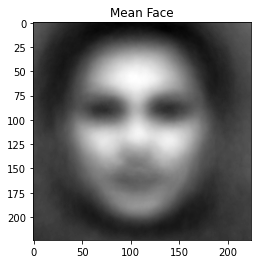

In [63]:
#STEP1: Convert the face images to face vectors
face_vector = []
for j in L:
    face_image = cv2.cvtColor(cv2.imread("/Users/ira/Documents/GitHub/ML-Project/Full Data"+"/"+str(j)), cv2.COLOR_RGB2GRAY)
    face_image = cv2.resize(face_image, (image_width, image_length))
    face_image = face_image.reshape(total_pixels,)
    face_vector.append(face_image)
face_vector = np.asarray(face_vector)
face_vector = face_vector.transpose()
#STEP2: Normalize the face vectors by calculating the average face vector and subtracting it from each vector
avg_face_vector = np.mean(face_vector,axis=1)
plt.imshow(avg_face_vector.reshape(image_width,image_length),cmap='gray')
plt.title('Mean Face')
avg_face_vector = avg_face_vector.reshape(face_vector.shape[0], 1)
normalized_face_vector = face_vector - avg_face_vector
print("Normalized Vectors:",normalized_face_vector)

In [64]:
#STEP3: Calculate the Covariance Matrix or the Sigma
covariance_matrix = np.cov(np.transpose(normalized_face_vector))
print("Covariance Matrix",covariance_matrix)

Covariance Matrix [[1554.23394753 -104.82936439 -240.9479495  ... 1207.36258418
  -126.57134195  311.62368565]
 [-104.82936439 1818.06674344 -145.73939405 ... -817.90724464
   815.99082817  459.11836182]
 [-240.9479495  -145.73939405 3772.73213973 ... -939.27454434
   411.34250074 -601.03516489]
 ...
 [1207.36258418 -817.90724464 -939.27454434 ... 4091.83215426
  -895.32867565  501.9465358 ]
 [-126.57134195  815.99082817  411.34250074 ... -895.32867565
  3567.87376706 -215.38056429]
 [ 311.62368565  459.11836182 -601.03516489 ...  501.9465358
  -215.38056429 1439.31120917]]


In [65]:
#STEP4: Calculate Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
#STEP5: Select the K best Eigen Faces, K < M
k = 50
k_eigen_vectors = eigen_vectors[0:k, :]
print("K Eigen Vectors Shape",k_eigen_vectors.shape)
#STEP6: Convert lower dimensionality K Eigen Vectors to Original Dimensionality
eigen_faces = k_eigen_vectors.dot(np.transpose(normalized_face_vector))
print("Eigen Faces",eigen_faces, "Eigen Faces Shape",eigen_faces.shape)
# STEP7: Represent Each eigen face as combination of the K Eigen Vectors
weights = np.transpose(normalized_face_vector).dot(np.transpose(eigen_faces))
print("Weights",weights)


K Eigen Vectors Shape (50, 1280)
Eigen Faces [[ -36.78723278  -37.48086878  -36.17806674 ...   59.61321243
    76.19053476   79.5647105 ]
 [-128.07667036 -128.05204064 -126.96513645 ...  -27.31736994
   -33.08471512  -16.97684347]
 [  56.84231489   62.69021779   66.36355537 ...   74.30837679
    64.71359734   55.14534699]
 ...
 [ -75.46742498  -76.13655777  -82.95987718 ...  100.75571942
   101.24588352  103.53760315]
 [ -73.17714409  -67.9546163   -71.3992867  ...   14.0613219
    10.35903166   -3.11877806]
 [   7.69917261    6.33895603   -4.34444884 ...  -30.33861093
   -26.84538082  -28.96902501]] Eigen Faces Shape (50, 50176)
Weights [[ 89478161.19128259  30180051.84679241 -64536011.01326424 ...
   38882360.66386633 -96990584.01436572  15676557.70810057]
 [ 80020013.57945955  -7540775.95644859 -10461996.53784016 ...
    5379356.31788805 -51409814.02344747   2503311.65589072]
 [-60235235.99978939 -13629599.22861442   5394394.00077259 ...
   20241977.74647781  55030149.28773454   632

In [70]:
#STEP8: Testing Phase
def test_image(test_add):
    test_img = cv2.imread(test_add)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
    test_img= cv2.resize(test_img, (image_width, image_length))
    test_img = test_img.reshape(total_pixels, 1)
    test_normalized_face_vector = test_img - avg_face_vector
    test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))
    index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))
    return L[index]

In [72]:
test_image("/Users/ira/Desktop/taylor.jpeg")

'Jennifer Lawrence_36.jpg'

In [ ]:
# Reading the image
img = cv2.imread('/Users/ira/Documents/GitHub/ML-Project/Collages/Collage_1.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('/Users/ira/Downloads/Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
cv2.imshow('Detected faces', img)
  
cv2.waitKey(0)